In [11]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<center> <h1> Generative models - Baseline </h1>

<b>Autor:</b> Edwin Rueda <br>
<b>email:</b> ejrueda95g@gmail.com <br>
<b>github:</b> https://github.com/ejrueda <br>
<b>website:</b> http://edwinrueda.com/ <br>
<b> You can cite this work with</b>:

@software{edwin_rueda_2020_3843381,<br>
  author       = {Edwin Rueda},<br>
  title        = {ejrueda/MasterUFPA: zenodo release},<br>
  month        = may,<br>
  year         = 2020,<br>
  publisher    = {Zenodo},<br>
  version      = {zenodo},<br>
  doi          = {10.5281/zenodo.3843381},<br>
  url          = {https://doi.org/10.5281/zenodo.3843381}<br>
}

- The baseline model is based on K-NN (https://scikit-learn.org/stable/modules/neighbors.html#unsupervised-neighbors)
- The objective is to train a KNN model to generate a synthetic samples based on K nearest neighbors.

### Sample generation - SMOTE: Synthetic Minority Over-sampling Technique
- article: https://www.jair.org/index.php/jair/article/view/10302
- mathematical formulation:
    - a new sample $x_{new}$ is based on a neighbor sample $x_n$ which is based on a KNN algorithm:
        - $x_{new} = x_{i}$ + $\lambda$$*(x_{n}-x_{i})$
        - where:
            - $\lambda$ is a random number between 0 and 1
            - $x_{i}$ is a sample of the dataset to be increase

In [108]:
(200/100)*30

60.0

In [196]:
def smote(T, N, k):
    """
    Inputs:
        T: data array to be increase
        N: Amount of SMOTE N%. between (0, 100]
        k: Number of nearest neighbors
    Ouput:
    (N/100)* T synthetic minority class samples
    (∗ If N is less than 100%, randomize the minority class samples as only a random
       percent of them will be SMOTEd. ∗)
    """
    if N < 100:
        idxs = np.random.choice(np.arange(0, len(T)), size=int(T*(N/100)), replace=False)
        T = T[idxs]
        N = 100
        
    N = int(N/100)*len(T)
    synthetic = np.ones((N, T.shape[1]))
    neigh = NearestNeighbors(n_neighbors = k)
    neigh.fit(T)
    #generating synthetic samples
    for i in range(N):
        #print(i)
        idx = np.random.randint(low=0, high=T.shape[0])
        T_sample = T[idx] #x_i sample
        #print(T_sample.shape)
        nn = neigh.kneighbors(T_sample.reshape(1,T.shape[1]), return_distance=False)
        #get random k-neighbor index
        nn_index = np.random.choice(nn[0])
        while (T_sample == T[nn_index]).any():
            nn_index = np.random.choice(nn[0])
        
        dif = T_sample - T[nn_index]
        gap = np.random.normal()
        synthetic[i] = T_sample + gap*dif
    
    return synthetic

In [197]:
a = np.random.normal(loc=1, scale=.5, size=(100,2))
a_synthetic = smote(a, 200, 4)

In [198]:
a.shape

(100, 2)

In [199]:
a_synthetic.shape

(200, 2)

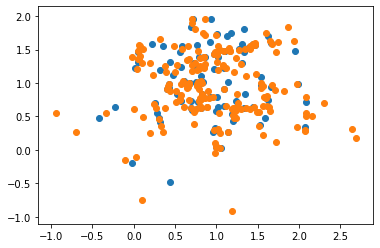

In [200]:
plt.scatter(a[:,0], a[:,1]);
plt.scatter(a_synthetic[:,0], a_synthetic[:,1]);


In [78]:
def generation_data(X, n, k):
    """
    returns synthetic data from an input data X.
    Retorna nuevos datos generados a partir de los pasados en X.

    Parameters
    ----------
    X : dataframe with the data to be augmented
    N : (0-1] percentage of data to be generate.
    k : int. number of k neighbors.

    Returns
    -------
    S : array, shape = [N * n_minority_samples, n_features]
    """    
    n_minority_samples, n_features = X.shape

    if (n<=0 or n>1): raise ValueError("N must be between (0,1]")

    n_synthetic_samples = int(n * n_minority_samples)
    S = np.zeros(shape=(n_synthetic_samples, n_features))
    aux = np.zeros(shape=X.shape)
    #Learn nearest neighbours
    neigh = NearestNeighbors(n_neighbors = k)
    neigh.fit(X)

    #Calculate synthetic samples
    for i in range(n_minority_samples):
        nn = neigh.kneighbors(np.array(X.iloc[i]).reshape(1,-1), return_distance=False)
        for j in np.arange(n):
            nn_index = np.random.choice(nn[0])
            #NOTE: nn includes T[i], we don't want to select it 
            while (X.iloc[nn_index].values == X.iloc[i].values).any():
                nn_index = np.random.choice(nn[0])

            dif = X.iloc[nn_index] - X.iloc[i]
            gap = np.random.random()
            aux[i] = X.iloc[i,:] + gap * dif[:]
    S = aux[np.random.choice(np.arange(aux.shape[0]),S.shape[0],replace=False),:]
    return S

In [92]:
np.random.choice(np.array([0,1,4]))

1

In [121]:
ng = NearestNeighbors(n_neighbors=2)

In [137]:
x = np.array([[1, 1, 1], [1,0,1], [2,0,1]])
x

array([[1, 1, 1],
       [1, 0, 1],
       [2, 0, 1]])

In [138]:
pd.DataFrame(x)

,0,1,2
0,1,1,1
1,1,0,1
2,2,0,1


In [139]:
ng.fit(x)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                 radius=1.0)

In [140]:
nn = ng.kneighbors(np.array([[2,1,1]]), return_distance=False)

In [145]:
np.random.choice(nn[0])


2